# Part A

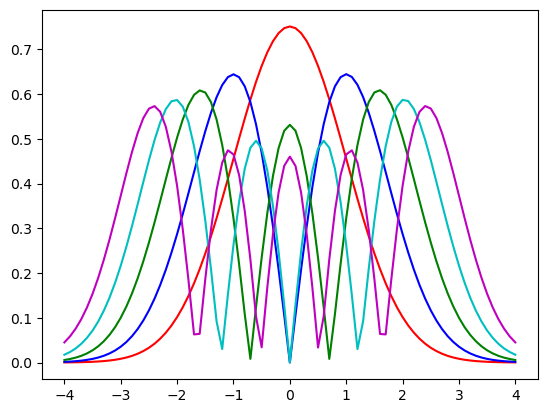

Sorted Eigenvalues: [0.9997357911454401, 2.9990026018203935, 4.998463055526372, 6.9975810050964355, 8.996254250407219]
Normalized Eigenvectors: [[2.56023908e-04 1.45261190e-03 5.65783873e-03 1.74247034e-02
  4.49716541e-02]
 [3.76704668e-04 2.08090003e-03 7.87406356e-03 2.34942195e-02
  5.85268010e-02]
 [5.51333049e-04 2.96477386e-03 1.08973736e-02 3.14957085e-02
  7.57119111e-02]
 [8.00736395e-04 4.19027275e-03 1.49549870e-02 4.18498820e-02
  9.70292818e-02]
 [1.15230933e-03 5.86545728e-03 2.03156030e-02 5.50069971e-02
  1.22892293e-01]
 [1.64247145e-03 8.12654770e-03 2.72920161e-02 7.14286436e-02
  1.53600245e-01]
 [2.31906176e-03 1.11444492e-02 3.62571649e-02 9.16072532e-02
  1.89280537e-01]
 [3.24162496e-03 1.51206884e-02 4.76086454e-02 1.15975906e-01
  2.29811529e-01]
 [4.48522818e-03 2.02874785e-02 6.17600352e-02 1.44840204e-01
  2.74657391e-01]
 [6.14601739e-03 2.69273187e-02 7.91314209e-02 1.78373546e-01
  3.22845863e-01]
 [8.33948492e-03 3.53568208e-02 1.00165628e-01 2.1655130

In [1]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def shoot_qho(t, x, epsilon, K):
    return [x[1], (K * t**2 - epsilon) * x[0]]

# Normalize the eigenfunction using trapezoidal integration
def normalize(y, xshoot):
    norm = np.abs(np.trapz(y[:, 0]**2, xshoot))
    normalized_y = np.abs(y[:, 0]) / np.sqrt(norm)
    return normalized_y

tol = 1e-6  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm']  # eigenfunc colors

L = 4
dx = 0.1
xshoot = np.arange(-L, L + dx, dx)
k = 1
eigen_vals = []  # Store the eigenvalues
eigen_funcs = np.zeros((len(xshoot), 5))

for modes in range(5):  # begin mode loop
    eps_guess = (modes + 1) * 2  # initial value of eigenvalue eps
    deps = 1  # default step size in eps
    
    for _ in range(1000):  # begin convergence loop for eps
        x0 = [1, np.sqrt(L**2 - eps_guess)]
        # Specify t_span as (start, end) and t_eval for specific evaluation points
        sol = solve_ivp(shoot_qho, (xshoot[0], xshoot[-1]), x0, t_eval=xshoot, args=(eps_guess, k))

        if abs(sol.y[1, -1] + np.sqrt(L**2 - eps_guess) * sol.y[0, -1]) < tol:  # check for convergence
            eigen_vals.append(eps_guess)  # write out eigenvalue
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * (sol.y[1, -1] + np.sqrt(L**2 - eps_guess) * sol.y[0, -1]) > 0:
            eps_guess -= deps
        else:
            eps_guess += deps / 2
            deps /= 2

    eps_guess = eps_guess - 0.1  # after finding eigenvalue, pick new start
    norm_y = normalize(sol.y.T, xshoot)  # calculate the normalization
    eigen_funcs[:, modes] = norm_y
    plt.plot(xshoot, norm_y, col[modes])  # plot modes

plt.show()  # end mode loop

A2 = eigen_vals
print("Sorted Eigenvalues:", A2)

A1 = eigen_funcs
print("Normalized Eigenvectors:", A1)




# Part b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Eigenvalues (A4): [0.99937352+0.j 2.996839  +0.j 4.99140656+0.j 6.98038865+0.j
 8.95060003+0.j]
Eigenfunctions (A3):
 [[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [

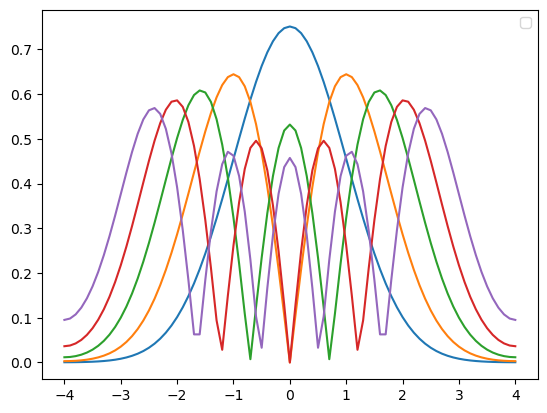

In [2]:
import numpy as np
from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt

L = 4  # domain size

x = np.arange(-L, L+0.1, 0.1)  # add boundary points
N = len(x) # discretization of interior
dx = x[1] - x[0]  # compute dx

# Dirichlet matrices for B
B = np.zeros((N-2, N-2))
for j in range(N-2):
    B[j, j] = -2-(dx**2)*(x[j + 1] ** 2)
for j in range(N - 3):
    B[j, j + 1] = 1
    B[j + 1, j] = 1


B[0][0] += 4/3
B[-1][-1] +=   4/3
B[0][1] += -1/3
B[-1][-2] +=  -1/3


# Calculate eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eigs(-B, k=5, which = 'SM')

phi_0 = (4/3)*eigenfunctions[0,:]-(1/3)*eigenfunctions[1,:]
phi_n = (4/3)*eigenfunctions[-1,:]-(1/3)*eigenfunctions[-2,:]

eigenfunctions_concat = np.vstack([phi_0, eigenfunctions, phi_n])

eigenfunctions_norm = np.zeros((N,5))
eigenvals_norm = np.zeros(5)
xnew = np.linspace(-L, L, N)

# Normalize the eigenvectors in D
for i in range(5):
    norm = np.trapz(np.abs(eigenfunctions_concat[:, i])**2, xnew)
    eigenfunctions_norm[:,i] = np.abs(eigenfunctions_concat[:,i]/np.sqrt(norm))

# Sort eigenvalues and eigenfunctions
#idx = np.argsort(eigenvalues)
#eigenvalues = eigenvalues[idx]
#eigenfunctions = eigenfunctions[:, idx]

eigenvals_norm = eigenvalues[:5]/dx**2



# Take the first five eigenvalues and corresponding eigenfunctions
A3 = np.abs(eigenfunctions_norm[:, :5])  # Absolute values of the eigenfunctions (first five columns)
A4 = eigenvals_norm[:5]                # First five eigenvalues

# Display Results
print("Eigenvalues (A4):", A4)
print("Eigenfunctions (A3):\n", A3)

#plt.plot(A3)
col = ['r', 'b', 'g', 'c', 'm']  # eigenfunc colors
x2 = np.linspace(-L, L, N) 
plt.plot(x2, A3) 
plt.legend()



# Part c

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import linalg as LA

def shoot_qho_gamma(t, x, epsilon, gamma):
    return [x[1], (gamma*np.abs(x[0])**2 + t**2 - epsilon) * x[0]]

L = 2
gamma = [0.05, -0.05]
dx = 0.1
xshoot =  np.arange(-L, L + dx, dx)
n = len(xshoot)
tol = 1e-4
t_span = [xshoot[0], xshoot[-1]]
eps_sol_c_pos, eps_sol_c_neg = np.zeros(2), np.zeros(2)
y_sol_c_pos, y_sol_c_neg = np.zeros((n,2)), np.zeros((n,2))

for val in gamma:
    eps0 = 0.1
    A = 1e-6
    for modes in range(1,3):
        dA = 0.01
        for i in range(1000):            
            eps = eps0
            d_eps = 0.2
            for j in range(1000):
                y0 = [A, np.sqrt(L**2 - eps) * A]
                sol = solve_ivp(lambda t,x:shoot_qho_gamma(t,x,eps,val), [xshoot[0],xshoot[-1]], y0, t_eval=xshoot)
                y_sol = sol.y.T
                x_sol = sol.t
                bc = y_sol[-1, 1] + np.sqrt(L**2 - eps) * y_sol[-1, 0]
                if np.abs(bc) < tol:
                    break
                if (-1) ** (modes + 1) * (bc) > 0:
                    eps += d_eps
                else:
                    eps -= d_eps / 2
                    d_eps /= 2
            area = np.trapz((y_sol[:,0]**2), x_sol)
           
            if abs(area - 1) < tol:
                break
            if area < 1:
                A += dA
            else:
                A -= dA
                dA /= 2
        eps0 = eps + 0.2
        norm_y_sol = np.abs(y_sol[:,0]) / area
        if val == gamma[0]:
            eps_sol_c_pos[modes - 1] = eps
            y_sol_c_pos[:,modes - 1] = norm_y_sol
        elif val == gamma[1]:
            eps_sol_c_neg[modes - 1] = eps
            y_sol_c_neg[:,modes - 1] = norm_y_sol
            
A5 = y_sol_c_pos 
A6 = eps_sol_c_pos 
A7 = y_sol_c_neg 
A8 = eps_sol_c_neg 

# Part d

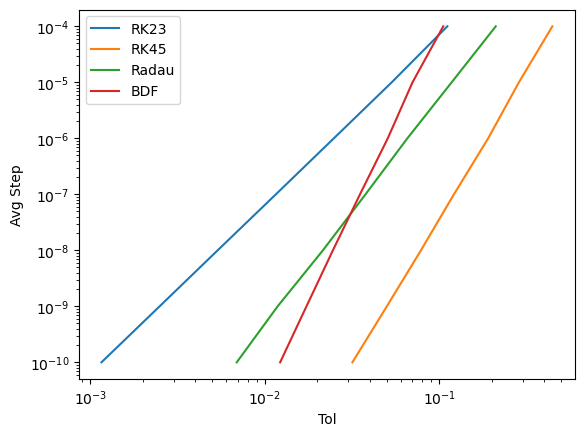

[5.24466756177217, 3.019099529504502, 4.038199269261615, 6.457512609631297]
(4,)
3.019099529504502
5.24466756177217
4.038199269261615
6.457512609631297


In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

eps_n = 1
gamma = 0
K=1
L = 2
t = [-L, L]
y0 = [1, np.sqrt(L**2 - 1)]

def shoot_qho2(t, x, epsilon, K):
    return [x[1], (K * t**2 - epsilon) * x[0]]

def hw1_rhs_a(t, y, epsilon):
    phi, dphi_dx = y  
    return [dphi_dx, (t**2 - epsilon) * phi]

TOL = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

RK23_steps = []
RK45_steps = []
Radau_steps = []
BDF_steps = []

for tol in TOL:  
    options = {'rtol': tol, 'atol': tol}
    
    RK23 = solve_ivp(shoot_qho2, t, y0, method='RK23', args=(eps_n, K), **options)
    RK23_avg_step = np.mean(np.diff(RK23.t))
    RK23_steps.append(RK23_avg_step)    
    
    RK45 = solve_ivp(shoot_qho2, t, y0, method='RK45', args=(eps_n, K), **options)
    RK45_avg_step = np.mean(np.diff(RK45.t))
    RK45_steps.append(RK45_avg_step)
    
    Radau = solve_ivp(shoot_qho2, t, y0, method='Radau', args=(eps_n, K), **options)
    Radau_avg_step = np.mean(np.diff(Radau.t))
    Radau_steps.append(Radau_avg_step)
    
    BDF = solve_ivp(shoot_qho2, t, y0, method='BDF', args=(eps_n, K), **options)
    BDF_avg_step = np.mean(np.diff(BDF.t))
    BDF_steps.append(BDF_avg_step)
    
    
plt.loglog(RK23_steps, TOL)
plt.loglog(RK45_steps, TOL)
plt.loglog(Radau_steps, TOL)
plt.loglog(BDF_steps, TOL)

plt.legend(['RK23', 'RK45', 'Radau', 'BDF'])

plt.xlabel('Tol')
plt.ylabel('Avg Step')
plt.show()

slope_RK23 =  np.polyfit(np.log10(RK23_steps), np.log10(TOL), 1)
slope_RK45 =  np.polyfit(np.log10(RK45_steps), np.log10(TOL), 1)
slope_Radau = np.polyfit(np.log10(Radau_steps), np.log10(TOL), 1)
slope_BDF =   np.polyfit(np.log10(BDF_steps), np.log10(TOL), 1)

A9 = [slope_RK45[0], slope_RK23[0], slope_Radau[0], slope_BDF[0]]
print(A9)
print(np.shape(A9))

print(slope_RK23[0])
print(slope_RK45[0])
print(slope_Radau[0])
print(slope_BDF[0])

# Part e

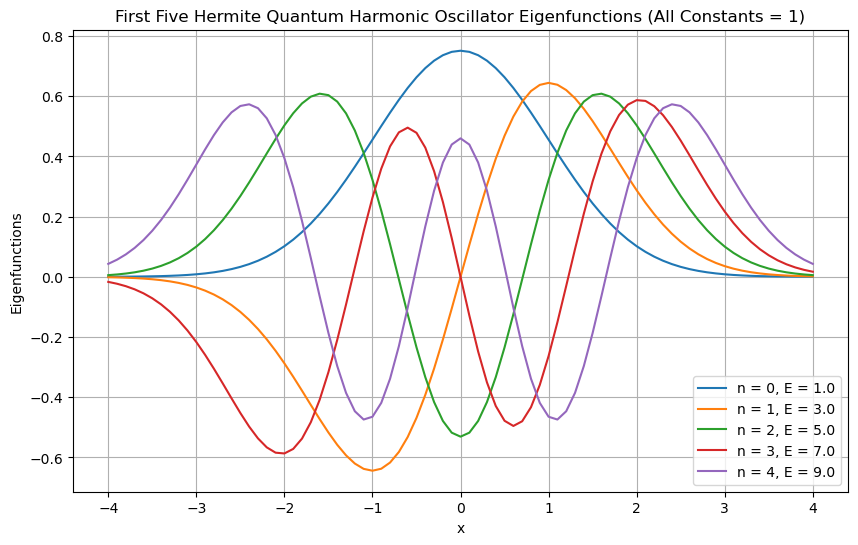

Eigenvalues (hermite_values): [1 3 5 7 9]
Eigenfunctions (hermite_vectors):
n = 0, Eigenfunction:
 [2.51974549e-04 3.74027037e-04 5.49675490e-04 7.99773119e-04
 1.15208438e-03 1.64308046e-03 2.32001304e-03 3.24323993e-03
 4.48874345e-03 6.15074251e-03 8.34425107e-03 1.12073836e-02
 1.49031531e-02 1.96204582e-02 2.55739130e-02 3.30021532e-02
 4.21642543e-02 5.33339350e-02 6.67912983e-02 8.28119858e-02
 1.01653788e-01 1.23540966e-01 1.48646768e-01 1.77074900e-01
 2.08840919e-01 2.43854761e-01 2.81905753e-01 3.22651505e-01
 3.65612053e-01 4.10170451e-01 4.55580672e-01 5.00983320e-01
 5.45429091e-01 5.87909372e-01 6.27392792e-01 6.62865966e-01
 6.93376268e-01 7.18074129e-01 7.36252262e-01 7.47379290e-01
 7.51125544e-01 7.47379290e-01 7.36252262e-01 7.18074129e-01
 6.93376268e-01 6.62865966e-01 6.27392792e-01 5.87909372e-01
 5.45429091e-01 5.00983320e-01 4.55580672e-01 4.10170451e-01
 3.65612053e-01 3.22651505e-01 2.81905753e-01 2.43854761e-01
 2.08840919e-01 1.77074900e-01 1.48646768e-01 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Constants set to 1 for simplicity (m = 1, omega = 1, hbar = 1)
L = 4         # spatial range for plotting
dx = 0.1     # spatial step size
xrange = np.arange(-L, L+dx, dx)

# Eigenvalues for the first five states
hermite_values = np.array([2*n+1  for n in range(5)])

# Function to calculate normalized eigenfunctions for a given quantum number
def harmonic_oscillator_eigenfunction(n, xrange):
    Hn = hermite(n)  # Get Hermite polynomial of degree n
    norm_const = (1 / np.pi)**0.25
    psi_n = norm_const / np.sqrt(2**n * factorial(n)) * Hn(xrange) * np.exp(-0.5 * xrange**2)
    return psi_n

# Compute eigenfunctions for the first five quantum states and store in matrix form
hermite_vectors = np.zeros((len(xrange), 5))
for n in range(5):
    hermite_vectors[:, n] = harmonic_oscillator_eigenfunction(n, xrange)

# Plot the first five eigenfunctions
plt.figure(figsize=(10, 6))
for n in range(5):
    plt.plot(xrange, hermite_vectors[:, n], label=f"n = {n}, E = {hermite_values[n]:.1f}")
plt.xlabel("x")
plt.ylabel("Eigenfunctions")
plt.title("First Five Hermite Quantum Harmonic Oscillator Eigenfunctions (All Constants = 1)")
plt.legend()
plt.grid()
plt.show()

# Displaying results
print("Eigenvalues (hermite_values):", hermite_values)
print("Eigenfunctions (hermite_vectors):")
for i in range(5):
    print(f"n = {i}, Eigenfunction:\n", hermite_vectors[:, i], "\n")


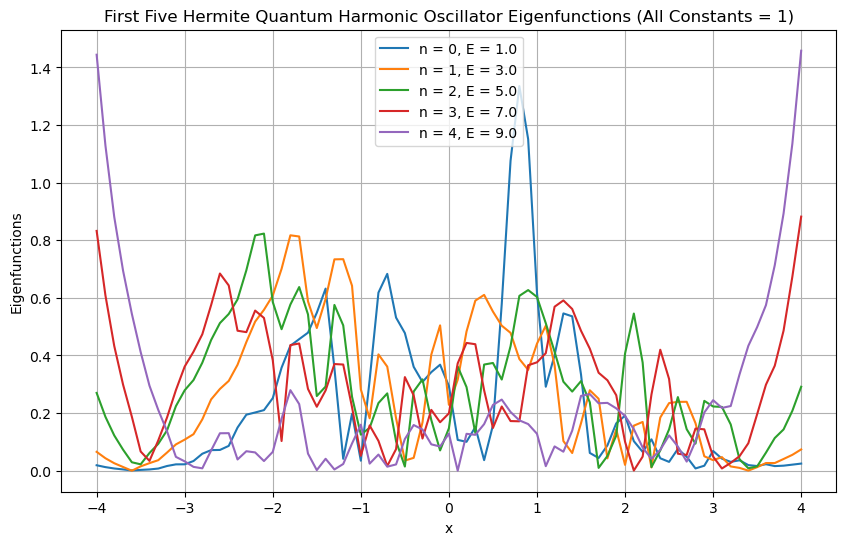

Difference in Hermite vs Shooting Method Eigenvalues: [0.02642089 0.03324661 0.03073889 0.03455707 0.04161944]
Difference in Hermite vs Shooting Method Eigenfunctions : [4.57692772e-08 1.72430976e-07 2.47860435e-07 4.35413483e-07
 1.96490611e-06]


In [6]:
shoot_hermite_functions = np.abs(A1)-np.abs(hermite_vectors)
norm_diff1 = np.zeros((len(xrange), 5))
normalized_diff = np.zeros((len(xrange), 5))

for n in range(5):
    norm_diff1[:,n] = np.abs(np.trapz(shoot_hermite_functions[:, n]**2, xrange))
    normalized_diff[:,n] = np.abs(shoot_hermite_functions[:, n]) / np.sqrt(norm_diff1[:, n])

# Plot the first five eigenfunctions
plt.figure(figsize=(10, 6))
for n in range(5):
    plt.plot(xrange, normalized_diff[:, n], label=f"n = {n}, E = {hermite_values[n]:.1f}")
plt.xlabel("x")
plt.ylabel("Eigenfunctions")
plt.title("First Five Hermite Quantum Harmonic Oscillator Eigenfunctions (All Constants = 1)")
plt.legend()
plt.grid()
plt.show()

#A10 = normalized_diff
A10 = norm_diff1[0,:]

shoot_hermite_values = np.abs(A2-hermite_values)
A11 = 100*(shoot_hermite_values/hermite_values)
A11

# Displaying results
print("Difference in Hermite vs Shooting Method Eigenvalues:", A11)
print("Difference in Hermite vs Shooting Method Eigenfunctions :", A10)
#for i in range(5):
#    print(f"n = {i}, Eigenfunction:\n", A10[:, i], "\n")

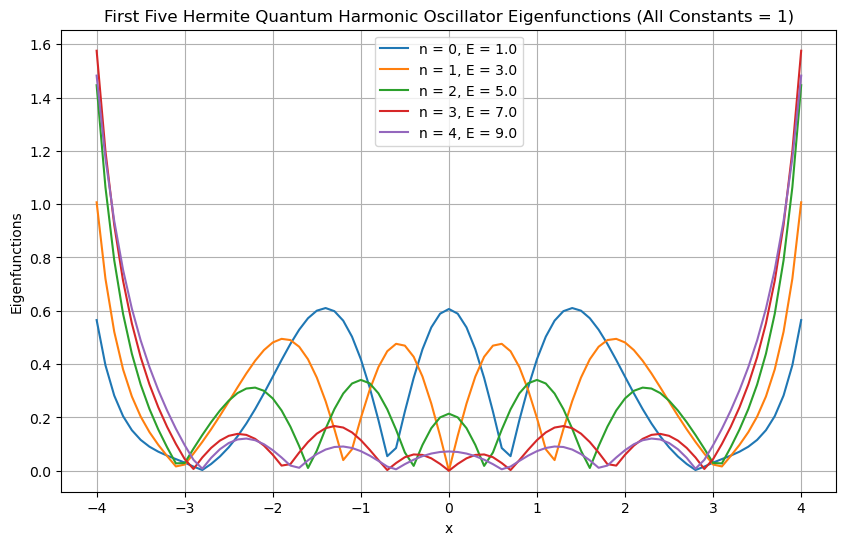

Difference in Hermite vs Shooting Method Eigenvalues: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
Difference in Hermite vs Shooting Method Eigenfunctions : [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]


In [7]:
direct_hermite_functions = np.abs(A3)-np.abs(hermite_vectors)
norm_diff2 = np.zeros((len(xrange), 5))
normalized_diff2 = np.zeros((len(xrange), 5))

for n in range(5):
    norm_diff2[:,n] = np.abs(np.trapz(direct_hermite_functions[:, n]**2, xrange))
    normalized_diff2[:,n] = np.abs(direct_hermite_functions[:, n]) / np.sqrt(norm_diff2[:, n])

# Plot the first five eigenfunctions
plt.figure(figsize=(10, 6))
for n in range(5):
    plt.plot(xrange, normalized_diff2[:, n], label=f"n = {n}, E = {hermite_values[n]:.1f}")
plt.xlabel("x")
plt.ylabel("Eigenfunctions")
plt.title("First Five Hermite Quantum Harmonic Oscillator Eigenfunctions (All Constants = 1)")
plt.legend()
plt.grid()
plt.show()

#A10 = normalized_diff
A12 = norm_diff2[0,:]

direct_hermite_values = np.abs(A4-hermite_values)
A13 = 100*(direct_hermite_values/hermite_values)
A13

# Displaying results
print("Difference in Hermite vs Shooting Method Eigenvalues:", A13)
print("Difference in Hermite vs Shooting Method Eigenfunctions :", A12)
#for i in range(5):
#    print(f"n = {i}, Eigenfunction:\n", A12[:, i], "\n")